In [ ]:
%matplotlib inline
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')



Following code line drops the null values

In [ ]:
dataframe = pd.read_csv('time_series_data_human_activities.csv', sep=',')
dataframe.shape


(1073623, 6)

In [ ]:
human_activity = dataframe.dropna()
human_activity.shape


(1073623, 6)

In [ ]:
print(human_activity['activity'].dtype)
#print(har_df['timestamp'].dytpe)
print(human_activity['user'].dtype)
print(human_activity['x-axis'].dtype)
print(human_activity['y-axis'].dtype)
print(human_activity['z-axis'].dtype)


object
int64
float64
float64
float64


In [ ]:
# drop the rows where timestamp is 0
dataframe = human_activity[human_activity['timestamp'] != 0]
human_activity.shape

(1073623, 6)

In [ ]:
# now arrange data in ascending order of the user and timestamp
human_activity = human_activity.sort_values(by = ['user', 'timestamp'], ignore_index=True)


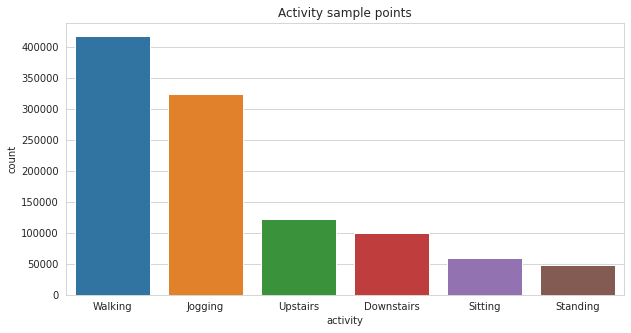

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 5))
sns.countplot(x = 'activity', data = dataframe)
plt.title("Activity sample points")
plt.show()

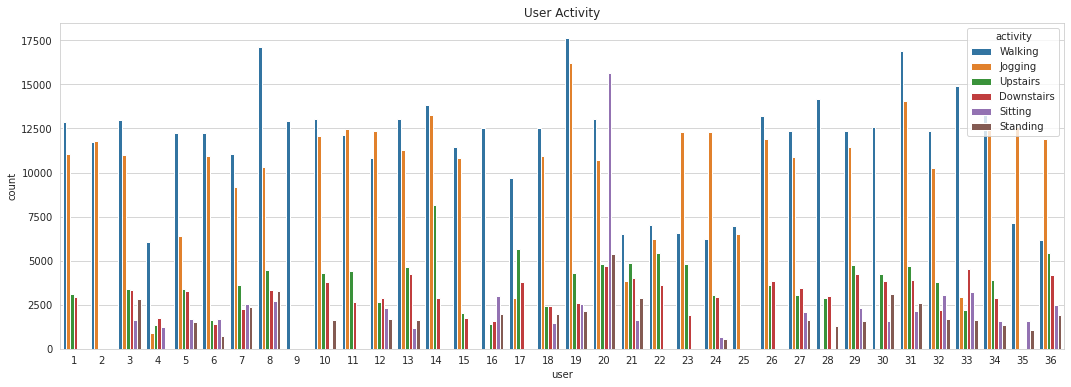

In [ ]:
plt.figure(figsize = (18, 6))
sns.countplot(x = 'user', hue = 'activity', data = dataframe)
plt.title('User Activity')
plt.show()



 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - Downstairs -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 




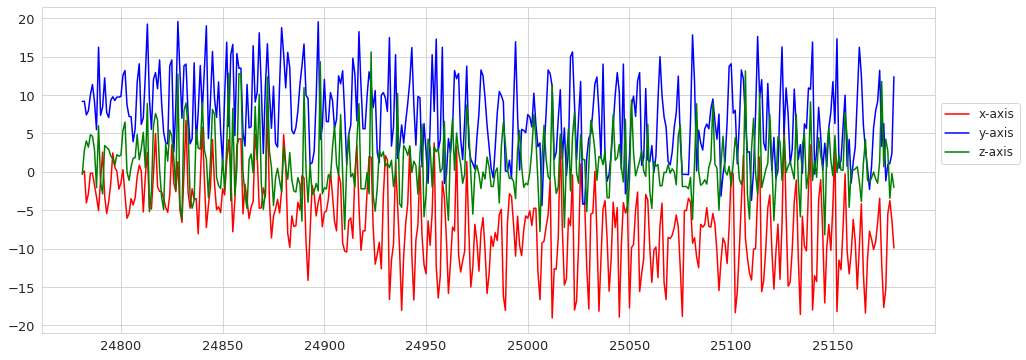



 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - Jogging -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 




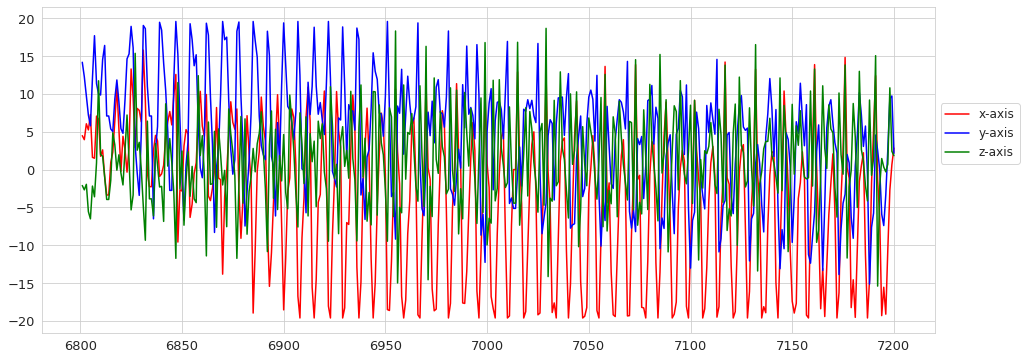



 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - Sitting -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 




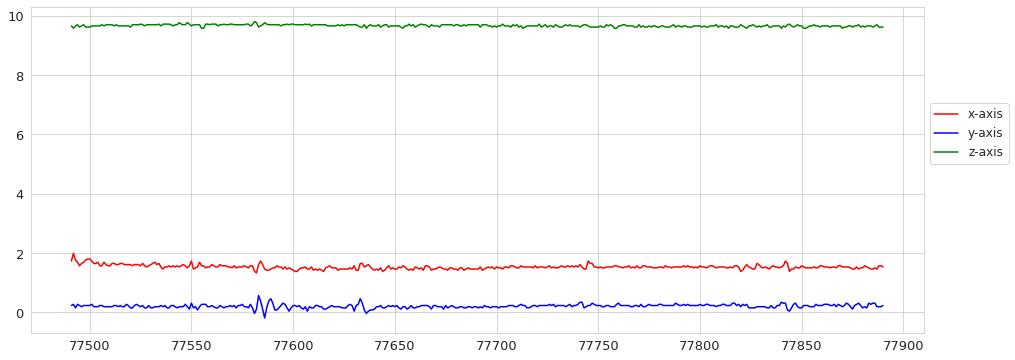



 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - Standing -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 




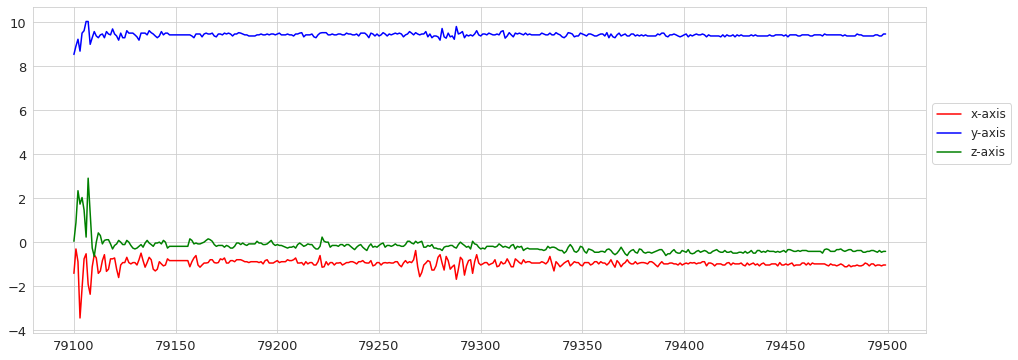



 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - Upstairs -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 




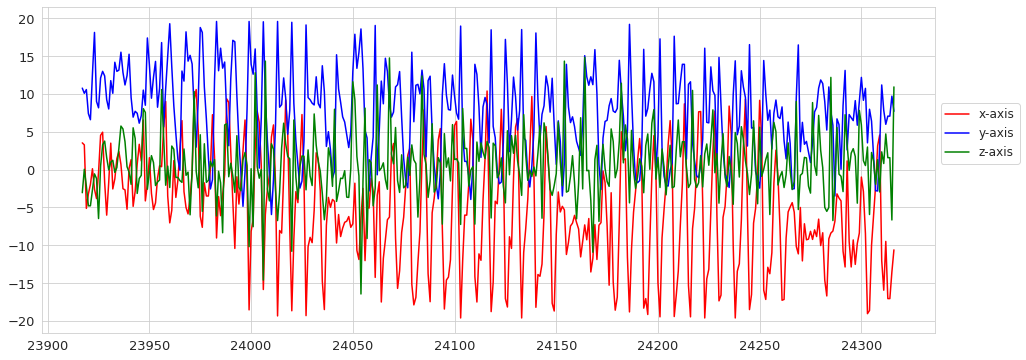



 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - Walking -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 




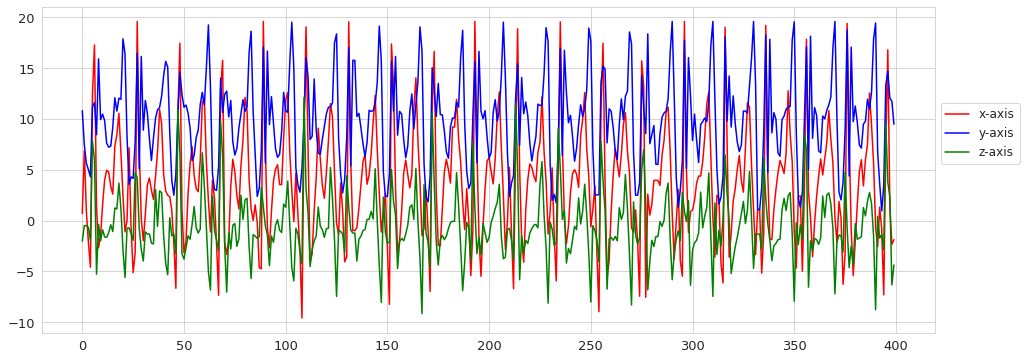

In [ ]:
def plot_activity(activity):
  data = human_activity[human_activity['activity'] == activity][['x-axis', 'y-axis', 'z-axis']][:400]
  axis = data["x-axis"].plot(subplots=True, color="r", fontsize = 13)
  axis = data["y-axis"].plot(subplots=True, color="b", fontsize = 13)
  axis = data["z-axis"].plot(subplots=True, color="g", fontsize = 13)
  for ax in axis:
      ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5), fontsize = 12)
for i in np.unique(human_activity['activity'].values):
  plt.figure(figsize = (16, 6))
  print("\n")
  print(" - "*15 + str(i) + " - "*15)
  print("\n")
  plot_activity(i)
  plt.show()

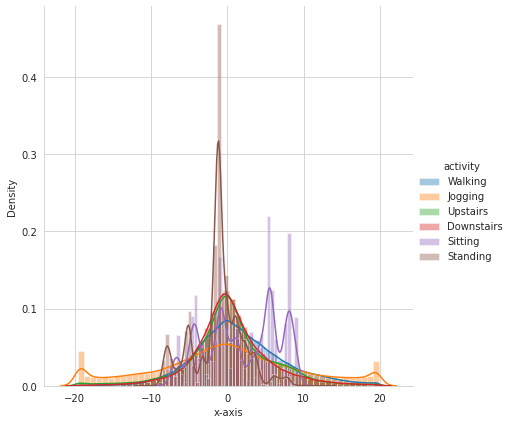

In [ ]:
sns.FacetGrid(dataframe, hue = 'activity', size = 6).map(sns.distplot, 'x-axis').add_legend()

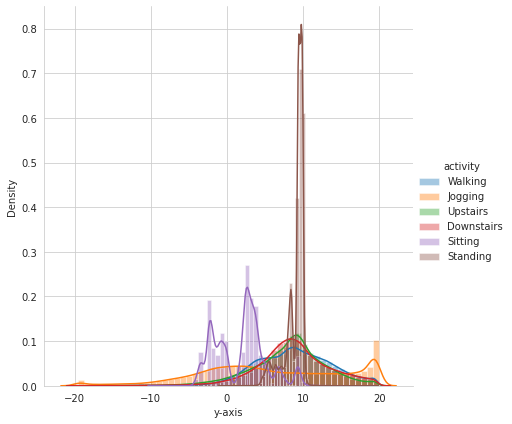

In [ ]:
sns.FacetGrid(dataframe, hue = 'activity', size = 6).map(sns.distplot, 'y-axis').add_legend()


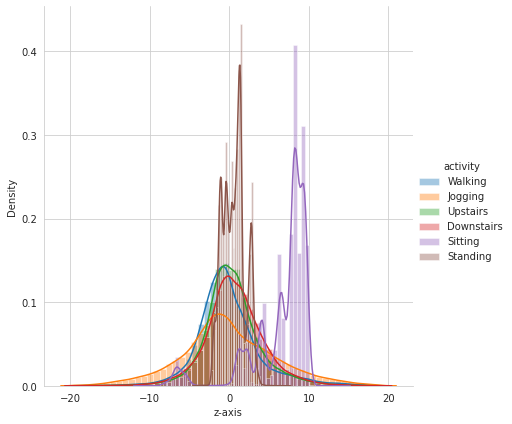

In [ ]:
sns.FacetGrid(dataframe, hue = 'activity', size = 6).map(sns.distplot, 'z-axis').add_legend()

In [ ]:
# train data -> Users upto User ID = 28 (i.e. 24 users)
train = dataframe[dataframe['user'] <= 28]
# test data -> Users from User ID = 28 to 36 (i.e. 12 users)
test = dataframe[dataframe['user'] > 28]

In [ ]:
x_set = []
y_set = []
z_set = []
train_labels = []

window_size = 100
step_size = 50


In [ ]:
for i in range(0, train.shape[0] - window_size, step_size):
    xval = train['x-axis'].values[i: i + 100]
    yval = train['y-axis'].values[i: i + 100]
    zval = train['z-axis'].values[i: i + 100]
    label_train = stats.mode(train['activity'][i: i + 100])[0][0]

    x_set.append(xval)
    y_set.append(yval)
    z_set.append(zval)
    train_labels.append(label_train)



In [ ]:
# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['x_mean'] = pd.Series(x_set).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_set).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_set).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_set).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_set).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_set).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_set).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_set).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_set).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_set).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_set).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_set).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_set).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_set).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_set).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_set).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_set).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_set).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_set).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_set).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_set).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_set).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_set).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_set).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_set).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_set).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_set).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_set).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_set).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_set).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_set).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_set).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_set).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_set).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_set).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_set).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_set).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_set).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_set).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_set).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_set).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_set).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_set).apply(lambda x: np.sum(x**2)/100)
X_train['y_energy'] = pd.Series(y_set).apply(lambda x: np.sum(x**2)/100)
X_train['z_energy'] = pd.Series(z_set).apply(lambda x: np.sum(x**2/100))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_set)**2 + pd.Series(y_set)**2 + pd.Series(z_set)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_set).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_set).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(z_set).apply(lambda x: np.sum(abs(x)/100))

In [ ]:
# converting the signals from time domain to frequency domain using FFT
x_set_fft = pd.Series(x_set).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
y_set_fft = pd.Series(y_set).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
z_set_fft = pd.Series(z_set).apply(lambda x: np.abs(np.fft.fft(x))[1:51])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_train['x_mean_fft'] = pd.Series(x_set_fft).apply(lambda x: x.mean())
X_train['y_mean_fft'] = pd.Series(y_set_fft).apply(lambda x: x.mean())
X_train['z_mean_fft'] = pd.Series(z_set_fft).apply(lambda x: x.mean())

# FFT std dev
X_train['x_std_fft'] = pd.Series(x_set_fft).apply(lambda x: x.std())
X_train['y_std_fft'] = pd.Series(y_set_fft).apply(lambda x: x.std())
X_train['z_std_fft'] = pd.Series(z_set_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_train['x_aad_fft'] = pd.Series(x_set_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad_fft'] = pd.Series(y_set_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad_fft'] = pd.Series(z_set_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_train['x_min_fft'] = pd.Series(x_set_fft).apply(lambda x: x.min())
X_train['y_min_fft'] = pd.Series(y_set_fft).apply(lambda x: x.min())
X_train['z_min_fft'] = pd.Series(z_set_fft).apply(lambda x: x.min())

# FFT max
X_train['x_max_fft'] = pd.Series(x_set_fft).apply(lambda x: x.max())
X_train['y_max_fft'] = pd.Series(y_set_fft).apply(lambda x: x.max())
X_train['z_max_fft'] = pd.Series(z_set_fft).apply(lambda x: x.max())

# FFT max-min diff
X_train['x_maxmin_diff_fft'] = X_train['x_max_fft'] - X_train['x_min_fft']
X_train['y_maxmin_diff_fft'] = X_train['y_max_fft'] - X_train['y_min_fft']
X_train['z_maxmin_diff_fft'] = X_train['z_max_fft'] - X_train['z_min_fft']

# FFT median
X_train['x_median_fft'] = pd.Series(x_set_fft).apply(lambda x: np.median(x))
X_train['y_median_fft'] = pd.Series(y_set_fft).apply(lambda x: np.median(x))
X_train['z_median_fft'] = pd.Series(z_set_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_train['x_mad_fft'] = pd.Series(x_set_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad_fft'] = pd.Series(y_set_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad_fft'] = pd.Series(z_set_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_train['x_IQR_fft'] = pd.Series(x_set_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR_fft'] = pd.Series(y_set_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR_fft'] = pd.Series(z_set_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_train['x_above_mean_fft'] = pd.Series(x_set_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean_fft'] = pd.Series(y_set_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean_fft'] = pd.Series(z_set_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_train['x_peak_count_fft'] = pd.Series(x_set_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count_fft'] = pd.Series(y_set_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count_fft'] = pd.Series(z_set_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_train['x_skewness_fft'] = pd.Series(x_set_fft).apply(lambda x: stats.skew(x))
X_train['y_skewness_fft'] = pd.Series(y_set_fft).apply(lambda x: stats.skew(x))
X_train['z_skewness_fft'] = pd.Series(z_set_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_train['x_kurtosis_fft'] = pd.Series(x_set_fft).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis_fft'] = pd.Series(y_set_fft).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis_fft'] = pd.Series(z_set_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_train['x_energy_fft'] = pd.Series(x_set_fft).apply(lambda x: np.sum(x**2)/50)
X_train['y_energy_fft'] = pd.Series(y_set_fft).apply(lambda x: np.sum(x**2)/50)
X_train['z_energy_fft'] = pd.Series(z_set_fft).apply(lambda x: np.sum(x**2/50))

# FFT avg resultant
X_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_set_fft)**2 + pd.Series(y_set_fft)**2 + pd.Series(z_set_fft)**2)**0.5)]

# FFT Signal magnitude area
X_train['sma_fft'] = pd.Series(x_set_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(y_set_fft).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(z_set_fft).apply(lambda x: np.sum(abs(x)/50))

In [ ]:
x_set_test = []
y_set_test = []
z_set_test = []
test_labels = []


In [ ]:
for i in range(0, test.shape[0] - window_size, step_size):
    xval = test['x-axis'].values[i: i + 100]
    yval = test['y-axis'].values[i: i + 100]
    zval = test['z-axis'].values[i: i + 100]
    label_test = stats.mode(test['activity'][i: i + 100])[0][0]

    x_set_test.append(xval)
    y_set_test.append(yval)
    z_set_test.append(zval)
    test_labels.append(label_test)

In [ ]:
X_test = pd.DataFrame()

In [ ]:

# mean
X_test['x_mean'] = pd.Series(x_set_test).apply(lambda x: x.mean())
X_test['y_mean'] = pd.Series(y_set_test).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_set_test).apply(lambda x: x.mean())

# std dev
X_test['x_std'] = pd.Series(x_set_test).apply(lambda x: x.std())
X_test['y_std'] = pd.Series(y_set_test).apply(lambda x: x.std())
X_test['z_std'] = pd.Series(z_set_test).apply(lambda x: x.std())

# avg absolute diff
X_test['x_aad'] = pd.Series(x_set_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad'] = pd.Series(y_set_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad'] = pd.Series(z_set_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['x_min'] = pd.Series(x_set_test).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_set_test).apply(lambda x: x.min())
X_test['z_min'] = pd.Series(z_set_test).apply(lambda x: x.min())

# max
X_test['x_max'] = pd.Series(x_set_test).apply(lambda x: x.max())
X_test['y_max'] = pd.Series(y_set_test).apply(lambda x: x.max())
X_test['z_max'] = pd.Series(z_set_test).apply(lambda x: x.max())

# max-min diff
X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']

# median
X_test['x_median'] = pd.Series(x_set_test).apply(lambda x: np.median(x))
X_test['y_median'] = pd.Series(y_set_test).apply(lambda x: np.median(x))
X_test['z_median'] = pd.Series(z_set_test).apply(lambda x: np.median(x))

# median abs dev 
X_test['x_mad'] = pd.Series(x_set_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad'] = pd.Series(y_set_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad'] = pd.Series(z_set_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['x_IQR'] = pd.Series(x_set_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR'] = pd.Series(y_set_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR'] = pd.Series(z_set_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['x_neg_count'] = pd.Series(x_set_test).apply(lambda x: np.sum(x < 0))
X_test['y_neg_count'] = pd.Series(y_set_test).apply(lambda x: np.sum(x < 0))
X_test['z_neg_count'] = pd.Series(z_set_test).apply(lambda x: np.sum(x < 0))

# positive count
X_test['x_pos_count'] = pd.Series(x_set_test).apply(lambda x: np.sum(x > 0))
X_test['y_pos_count'] = pd.Series(y_set_test).apply(lambda x: np.sum(x > 0))
X_test['z_pos_count'] = pd.Series(z_set_test).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['x_above_mean'] = pd.Series(x_set_test).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean'] = pd.Series(y_set_test).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean'] = pd.Series(z_set_test).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['x_peak_count'] = pd.Series(x_set_test).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count'] = pd.Series(y_set_test).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count'] = pd.Series(z_set_test).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_test['x_skewness'] = pd.Series(x_set_test).apply(lambda x: stats.skew(x))
X_test['y_skewness'] = pd.Series(y_set_test).apply(lambda x: stats.skew(x))
X_test['z_skewness'] = pd.Series(z_set_test).apply(lambda x: stats.skew(x))

# kurtosis
X_test['x_kurtosis'] = pd.Series(x_set_test).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis'] = pd.Series(y_set_test).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis'] = pd.Series(z_set_test).apply(lambda x: stats.kurtosis(x))

# energy
X_test['x_energy'] = pd.Series(x_set_test).apply(lambda x: np.sum(x**2)/100)
X_test['y_energy'] = pd.Series(y_set_test).apply(lambda x: np.sum(x**2)/100)
X_test['z_energy'] = pd.Series(z_set_test).apply(lambda x: np.sum(x**2/100))

# avg resultant
X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_set_test)**2 + pd.Series(y_set_test)**2 + pd.Series(z_set_test)**2)**0.5)]

# signal magnitude area
X_test['sma'] =    pd.Series(x_set_test).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_set_test).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(z_set_test).apply(lambda x: np.sum(abs(x)/100))

In [ ]:
# converting the signals from time domain to frequency domain using FFT
x_set_fft_test = pd.Series(x_set_test).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
y_set_fft_test = pd.Series(y_set_test).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
z_set_fft_test = pd.Series(z_set_test).apply(lambda x: np.abs(np.fft.fft(x))[1:51])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_test['x_mean_fft'] = pd.Series(x_set_fft_test).apply(lambda x: x.mean())
X_test['y_mean_fft'] = pd.Series(y_set_fft_test).apply(lambda x: x.mean())
X_test['z_mean_fft'] = pd.Series(z_set_fft_test).apply(lambda x: x.mean())

# FFT std dev
X_test['x_std_fft'] = pd.Series(x_set_fft_test).apply(lambda x: x.std())
X_test['y_std_fft'] = pd.Series(y_set_fft_test).apply(lambda x: x.std())
X_test['z_std_fft'] = pd.Series(z_set_fft_test).apply(lambda x: x.std())

# FFT avg absolute diff
X_test['x_aad_fft'] = pd.Series(x_set_fft_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad_fft'] = pd.Series(y_set_fft_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad_fft'] = pd.Series(z_set_fft_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_test['x_min_fft'] = pd.Series(x_set_fft_test).apply(lambda x: x.min())
X_test['y_min_fft'] = pd.Series(y_set_fft_test).apply(lambda x: x.min())
X_test['z_min_fft'] = pd.Series(z_set_fft_test).apply(lambda x: x.min())

# FFT max
X_test['x_max_fft'] = pd.Series(x_set_fft_test).apply(lambda x: x.max())
X_test['y_max_fft'] = pd.Series(y_set_fft_test).apply(lambda x: x.max())
X_test['z_max_fft'] = pd.Series(z_set_fft_test).apply(lambda x: x.max())

# FFT max-min diff
X_test['x_maxmin_diff_fft'] = X_test['x_max_fft'] - X_test['x_min_fft']
X_test['y_maxmin_diff_fft'] = X_test['y_max_fft'] - X_test['y_min_fft']
X_test['z_maxmin_diff_fft'] = X_test['z_max_fft'] - X_test['z_min_fft']

# FFT median
X_test['x_median_fft'] = pd.Series(x_set_fft_test).apply(lambda x: np.median(x))
X_test['y_median_fft'] = pd.Series(y_set_fft_test).apply(lambda x: np.median(x))
X_test['z_median_fft'] = pd.Series(z_set_fft_test).apply(lambda x: np.median(x))

# FFT median abs dev 
X_test['x_mad_fft'] = pd.Series(x_set_fft_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad_fft'] = pd.Series(y_set_fft_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad_fft'] = pd.Series(z_set_fft_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_test['x_IQR_fft'] = pd.Series(x_set_fft_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR_fft'] = pd.Series(y_set_fft_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR_fft'] = pd.Series(z_set_fft_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_test['x_above_mean_fft'] = pd.Series(x_set_fft_test).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean_fft'] = pd.Series(y_set_fft_test).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean_fft'] = pd.Series(z_set_fft_test).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_test['x_peak_count_fft'] = pd.Series(x_set_fft_test).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count_fft'] = pd.Series(y_set_fft_test).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count_fft'] = pd.Series(z_set_fft_test).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_test['x_skewness_fft'] = pd.Series(x_set_fft_test).apply(lambda x: stats.skew(x))
X_test['y_skewness_fft'] = pd.Series(y_set_fft_test).apply(lambda x: stats.skew(x))
X_test['z_skewness_fft'] = pd.Series(z_set_fft_test).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_test['x_kurtosis_fft'] = pd.Series(x_set_fft_test).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis_fft'] = pd.Series(y_set_fft_test).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis_fft'] = pd.Series(z_set_fft_test).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_test['x_energy_fft'] = pd.Series(x_set_fft_test).apply(lambda x: np.sum(x**2)/50)
X_test['y_energy_fft'] = pd.Series(y_set_fft_test).apply(lambda x: np.sum(x**2)/50)
X_test['z_energy_fft'] = pd.Series(z_set_fft_test).apply(lambda x: np.sum(x**2/50))

# FFT avg resultant
X_test['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_set_fft_test)**2 + pd.Series(y_set_fft_test)**2 + pd.Series(z_set_fft_test)**2)**0.5)]

# FFT Signal magnitude area
X_test['sma_fft'] = pd.Series(x_set_fft_test).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(y_set_fft_test).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(z_set_fft_test).apply(lambda x: np.sum(abs(x)/50))

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)


--------------------------------------------------




DATA PREPRAPERATION IS DONE HERE!









----------------------------------------------------

In [ ]:
X_train.head()
type(X_train)
print(X_train.dtypes)

x_mean                 float64
y_mean                 float64
z_mean                 float64
x_std                  float64
y_std                  float64
                        ...   
x_energy_fft           float64
y_energy_fft           float64
z_energy_fft           float64
avg_result_accl_fft    float64
sma_fft                float64
Length: 94, dtype: object


In [ ]:
X_train_list = X_train.values.tolist()
X_test_list = X_test.values.tolist()
y_test_list = y_test.tolist()

y_train_list = y_train.tolist()

In [ ]:
print(type(X_test.head()))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(y_test)

['Sitting' 'Sitting' 'Sitting' ... 'Standing' 'Standing' 'Standing']


In [ ]:
print(y_train)

['Walking' 'Walking' 'Walking' ... 'Standing' 'Standing' 'Standing']


In [ ]:
#--------------------KNN---------------------------


import scipy.spatial
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [ ]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)
    
    def predict(self, X_test):
        final_output = []
        
        for i in range(len(X_test)):
            d = []
            votes = []
         
            for j in range(len(self.X_train)):
                #print(j)
                # print(self.X_train[j+1])
                dist = scipy.spatial.distance.euclidean(self.X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for _d, j in d:
                votes.append(self.y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)
            
        return final_output
    
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        # print(predictions)
        # print(predictions == y_test)
        
        """for i in predictions:
          print(i, end= ' ')
        predictions == y_test"""
        temp = 0
        for i in range(len(y_test)):
            if predictions[i]== y_test[i]:
               temp = temp+1
        result = temp/len(y_test)

        return result


In [ ]:

clf = KNN(136)
clf.fit(X_train_list, y_train_list)
print("KNN Score =")
clf.score(X_test_list, y_test_list)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
temp2 = 0
model = KNeighborsClassifier(n_neighbors=136)

# Train the model using the training sets
model.fit(X_train_list,y_train_list)

#Predict Output
predicted= model.predict(X_test_list) # 0:Overcast, 2:Mild
#print(predicted)
for i in range(len(y_test_list)):
    if predicted[i]== y_test_list[i]:
       temp2 = temp2+1
result = temp2/len(y_test_list)
print(result)

0.7249084954729339


Minimum error:- 0.2747062223078405 at K = 136


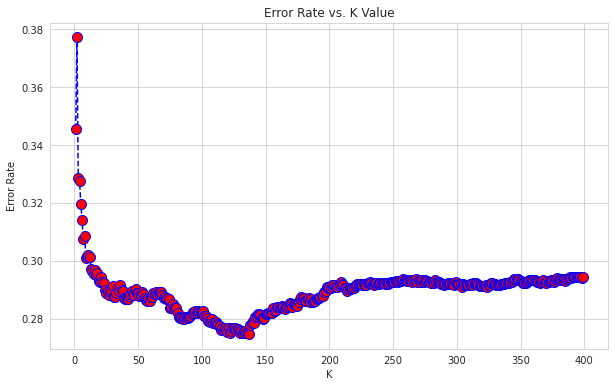

In [ ]:
error_rate = []
for i in range(1,400):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,400),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
best_k_value = error_rate.index(min(error_rate)
clf = KNN(best_k_value)
clf.fit(X_train_list, y_train_list)
print("KNN Score =")
clf.score(X_test_list, y_test_list)

In [ ]:
### ---------------------------------------- Decision Tree ------------------------------



In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_list,y_train_list)

#Predict the response for test dataset
y_pred = clf.predict(X_test_list)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_list, y_pred))


Accuracy: 0.7640146407243306


The above code is Decision Tree classification with scikit library.After that I am modeliing from stracth.


In [ ]:
## ---------- node class ---------
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

In [ ]:

class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        # print(num_samples)
        # print(num_features)
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            print(feature_index)
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "entropy")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split

    
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
      
        return "warning gini"
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        # print(type(feature_val))
        # print(type(tree.threshold))
        new_threshold = tree.threshold.astype(np.float)
        if feature_val<=new_threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [ ]:
X_train_numpy = X_train.to_numpy()
X_test_numpy = X_test.to_numpy()
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train_numpy[:1000],np.array([y_train[:1000]]).T)
classifier.print_tree()

Y_pred = classifier.predict(X_test_numpy) 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Y_pred)

In [ ]:
X_test_numpy = X_test.to_numpy()
Y_pred = classifier.predict(X_test_numpy) 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Y_pred)

0.4020419957618956

## Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)
# logistic regression model
lr = LogisticRegression(random_state = 21)
lr.fit(X_train_data_lr, y_train)
y_pred = lr.predict(X_test_data_lr)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.8431901367751878

 -------------Classification Report-------------

              precision    recall  f1-score   support

  Downstairs       0.67      0.74      0.71       514
     Jogging       0.82      0.94      0.88      1520
     Sitting       0.92      0.99      0.95       361
    Standing       0.99      0.82      0.90       299
    Upstairs       0.70      0.63      0.66       582
     Walking       0.93      0.83      0.88      1915

    accuracy                           0.84      5191
   macro avg       0.84      0.83      0.83      5191
weighted avg       0.85      0.84      0.84      5191



In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MyLogisticReg(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.params = {}
        self.n_features = None
        self.n_class = None
        self.verbose = 0

    def init_params(self, X, y):
        """Randomly initializing parameters"""
        self.n_features = X.shape[1]  # number of features
        #n_classes = len(np.unique(y.flatten()))
        
        n_classes = y.shape[1]
        print("n_classes=",n_classes)
        # set to 1 instead of 2 for binary classification, 
        #  because of how matrix multiplication works for binary classifcation
        self.n_class = n_classes if n_classes > 2 else 1
        # the matrix for slope coefficients
        self.params['coef'] = np.random.randn(self.n_features, self.n_class)
        # the y-intercept
        self.params['intercept'] = np.random.randn(1, self.n_class)
        if self.verbose:
            print("[INFO] Initialized parameters.")
            print(f"Shape of coefficient matrix: {self.params['coef'].shape}")
            print(f"Shape of intercept matrix: {self.params['intercept'].shape}")

    def get_logits(self, X, y=None):
        # logits = log(odds) = X@W + b
        if 'coef' not in self.params and y is None:
            # initialize the parameters if haven't
            # self.init_params(X)
            raise Exception("This LogisticRegression instance is not fitted yet." +
                             "Call 'fit' with appropriate arguments before using this estimator.")
        elif 'coef' not in self.params and y is not None:
            print("[INFO] The model is not fitted yet. Using random parameters.")
            self.init_params(X, y)
        return X @ self.params['coef'] + self.params['intercept']
    
    def predict_proba(self, X, y=None):
        """
        If binary classification, use sigmoid function.
        If multi-class classification, use softmax function.
        """
        if y is not None:
            # predict using randomly initialized parameters
            logits = self.get_logits(X, y)
        else:
            logits = self.get_logits(X)
            
        if self.n_class == 1:
           
            return 1 / (1 + np.exp(-logits))
        import numpy as np
        mx = np.max(logits, axis=-1, keepdims=True)
        numerator = np.exp(logits - mx)
        denominator = np.sum(numerator, axis=-1, keepdims=True)
        return numerator / denominator
    def softmax(x):
     mx = np.max(x, axis=-1, keepdims=True)
        print(f"{mx = }")
        print(f"{x - mx = }")
        numerator = np.exp(x - mx)
        denominator = np.sum(numerator, axis=-1, keepdims=True)
        print(f"{denominator = }")
        return numerator / denominator
 
    def fit(self, X, y, learning_rate=0.05, iterations=1000, verbose=0):
        print("fit")
        self.verbose = verbose
        print(" X and Y")
        if isinstance(X, pd.DataFrame):
            # convert Dataframe to numpy for faster computations 
            X = X.values
            #print(X)
            print("---------------------")
        if isinstance(y, pd.DataFrame):
            y = y.values
            #print(y)
            
        # initialize parameters
        print("---------------------")
        self.init_params(X, y)

        m = X.shape[0]  # number of samples
        
        if self.verbose:
            print("[INFO] Training ...")
        for i in range(1, iterations + 1):
            # using method for binary classification
            if self.n_class == 1:
                # make predictions by computing probability
                y_proba = self.predict_proba(X)
              
                # calculate the binary cross-entropy loss
                loss = - (1 / m) * np.sum(y * np.log(y_proba) \
                            + (1 - y) * np.log(1 - y_proba))
                
                # calculate gradients via derivatives
                #  with respect to loss function (refer above)
                dW = (1 / m) * (X.T @ (y_proba - y))
                db = (1 / m) * np.sum(y_proba - y)
                
            # using method for multi-class classification
            else:
                # make predictions by computing probability
                y_proba = self.predict_proba(X, y)
                # calculate the categorical cross-entropy loss.
                # Here the `y` stands for "target" (the true class labels),
                #  and the `y_proba` stands for output 
                #  (the computed probability via softmax;
                #  not the predicted class label).
                
                loss = - ((1 / m)) * np.sum(y * np.log(y_proba))

                # calculate gradients via derivatives 
                #  with respect to loss function (refer above)
                dW = (1 / m) * (X.T @ (y_proba - y))
                db = (1 / m) * np.sum((y_proba - y), axis=0, keepdims=True)
                # print(dW.shape, db.shape)
                # break

            # use gradient descent to update parameters
            # parameter = parameter - (learning_rate * derivative_of_parameter)
            self.params['coef'] -= (learning_rate * dW)
            self.params['intercept'] -= (learning_rate * db)
            
            if self.verbose and (i == 1 or i % 100 == 0):
                print(f"\nIteration {i}/{iterations}")
                print("--" * 12)
                print(f"Loss: {loss}")
                print(f"Coefficient:\n{self.params['coef']}")
                print(f"Intercept:\n{self.params['intercept']}")

    def predict(self, X, threshold=0.5):
        y_proba = self.predict_proba(X)
        if self.n_class == 1:
            y_pred = np.where(y_proba > threshold, 1, 0)
        else:
            # get the index of the max probability as the predicted class
            y_pred = np.argmax(y_proba, axis=1)
        return y_pred
    
    def predict_score(self, X, y):
        from sklearn.metrics import accuracy_score
        y_pred = self.predict(X)
        if self.n_class > 1:
            y = np.argmax(y, axis=1)
        return accuracy_score(y.reshape(-1), y_pred.reshape(-1))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

k = y_train.reshape(-1,1)
y_encoded = encoder.fit_transform(k)
print("y_encoded=",y_encoded)


y_encoded= [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [ ]:


model = MyLogisticReg()
# set verbose=1 to see the training progress

model.fit(X_train,y_encoded, learning_rate=0.05, iterations=1500, verbose=1)
#y_pred = model.predict(X_test)
print("Result in accuracy:")
print(f"My implementation\t: {model.predict_score(X_test,y_test)}")
